In [1]:
import re
import numpy as np

def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })


    return unique_word_dict 

In [2]:
# text = "I love my study so much also start to study well all"

In [3]:
t2=["I" ,"love","my", "study","so","much","also","start","to","study","well"]

In [4]:
create_unique_word_dict(t2)

{'I': 0,
 'also': 1,
 'love': 2,
 'much': 3,
 'my': 4,
 'so': 5,
 'start': 6,
 'study': 7,
 'to': 8,
 'well': 9}

In [5]:
   

def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will']
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

# Functions to find the most similar word 
def euclidean(vec1:np.array, vec2:np.array) -> float:
    """
    A function to calculate the euclidean distance between two vectors
    """
    return np.sqrt(np.sum((vec1 - vec2)**2))

def find_similar(word:str, embedding_dict:dict, top_n=10)->list:
    """
    A method to find the most similar word based on the learnt embeddings
    """
    dist_dict = {}
    word_vector = embedding_dict.get(word, [])
    if len(word_vector) > 0:
        for key, value in embedding_dict.items():
            if key!=word:
                dist = euclidean(word_vector, value)
                dist_dict.update({
                    key: dist
                })

        return sorted(dist_dict.items(), key=lambda x: x[1])[0:top_n]       

In [6]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm

# Drawing the embeddings
import matplotlib.pyplot as plt

# Deep learning: 
from keras.models import Input, Model
from keras.layers import Dense

from scipy import sparse

# Custom functions
#from utility import text_preprocessing, create_unique_word_dict

Using TensorFlow backend.


In [7]:
# Reading the text from the input folder
texts = pd.read_csv('sample1.csv')
texts = [x for x in texts['text']]

# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

unique_word_dict = create_unique_word_dict(all_text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = sparse.csr_matrix(X)
Y = sparse.csr_matrix(Y)

# Defining the size of the embedding
#embed_size = 2

84it [00:00, ?it/s]


Epoch 1/1000
84/84 [==============================] - 2s 23ms/step - loss: 3.0770
Epoch 2/1000
84/84 [==============================] - 0s 142us/step - loss: 3.0746
Epoch 3/1000
84/84 [==============================] - 0s 83us/step - loss: 3.0726
Epoch 4/1000
84/84 [==============================] - 0s 47us/step - loss: 3.0705
Epoch 5/1000
84/84 [==============================] - 0s 47us/step - loss: 3.0683
Epoch 6/1000
84/84 [==============================] - 0s 47us/step - loss: 3.0661
Epoch 7/1000
84/84 [==============================] - 0s 47us/step - loss: 3.0639
Epoch 8/1000
84/84 [==============================] - 0s 36us/step - loss: 3.0617
Epoch 9/1000
84/84 [==============================] - 0s 95us/step - loss: 3.0596
Epoch 10/1000
84/84 [==============================] - 0s 24us/step - loss: 3.0575
Epoch 11/1000
84/84 [==============================] - 0s 24us/step - loss: 3.0554
Epoch 12/1000
84/84 [==============================] - 0s 36us/step - loss: 3.0533
Epoch 13/100

Epoch 100/1000
84/84 [==============================] - 0s 36us/step - loss: 2.8647
Epoch 101/1000
84/84 [==============================] - 0s 36us/step - loss: 2.8620
Epoch 102/1000
84/84 [==============================] - 0s 24us/step - loss: 2.8593
Epoch 103/1000
84/84 [==============================] - 0s 24us/step - loss: 2.8566
Epoch 104/1000
84/84 [==============================] - 0s 24us/step - loss: 2.8539
Epoch 105/1000
84/84 [==============================] - 0s 47us/step - loss: 2.8511
Epoch 106/1000
84/84 [==============================] - 0s 36us/step - loss: 2.8484
Epoch 107/1000
84/84 [==============================] - 0s 36us/step - loss: 2.8456
Epoch 108/1000
84/84 [==============================] - 0s 36us/step - loss: 2.8428
Epoch 109/1000
84/84 [==============================] - 0s 24us/step - loss: 2.8400
Epoch 110/1000
84/84 [==============================] - 0s 36us/step - loss: 2.8372
Epoch 111/1000
84/84 [==============================] - 0s 24us/step - loss:

Epoch 198/1000
84/84 [==============================] - 0s 36us/step - loss: 2.5590
Epoch 199/1000
84/84 [==============================] - 0s 35us/step - loss: 2.5561
Epoch 200/1000
84/84 [==============================] - 0s 36us/step - loss: 2.5532
Epoch 201/1000
84/84 [==============================] - 0s 36us/step - loss: 2.5503
Epoch 202/1000
84/84 [==============================] - 0s 35us/step - loss: 2.5475
Epoch 203/1000
84/84 [==============================] - 0s 36us/step - loss: 2.5446
Epoch 204/1000
84/84 [==============================] - 0s 48us/step - loss: 2.5418
Epoch 205/1000
84/84 [==============================] - 0s 24us/step - loss: 2.5390
Epoch 206/1000
84/84 [==============================] - 0s 36us/step - loss: 2.5363
Epoch 207/1000
84/84 [==============================] - 0s 24us/step - loss: 2.5335
Epoch 208/1000
84/84 [==============================] - 0s 24us/step - loss: 2.5307
Epoch 209/1000
84/84 [==============================] - 0s 36us/step - loss:

Epoch 393/1000
84/84 [==============================] - 0s 47us/step - loss: 2.1845
Epoch 394/1000
84/84 [==============================] - 0s 36us/step - loss: 2.1834
Epoch 395/1000
84/84 [==============================] - 0s 36us/step - loss: 2.1823
Epoch 396/1000
84/84 [==============================] - 0s 36us/step - loss: 2.1813
Epoch 397/1000
84/84 [==============================] - 0s 47us/step - loss: 2.1802
Epoch 398/1000
84/84 [==============================] - 0s 36us/step - loss: 2.1792
Epoch 399/1000
84/84 [==============================] - 0s 48us/step - loss: 2.1782
Epoch 400/1000
84/84 [==============================] - 0s 24us/step - loss: 2.1772
Epoch 401/1000
84/84 [==============================] - 0s 47us/step - loss: 2.1762
Epoch 402/1000
84/84 [==============================] - 0s 35us/step - loss: 2.1752
Epoch 403/1000
84/84 [==============================] - 0s 24us/step - loss: 2.1742
Epoch 404/1000
84/84 [==============================] - 0s 36us/step - loss:

Epoch 491/1000
84/84 [==============================] - 0s 24us/step - loss: 2.1115
Epoch 492/1000
84/84 [==============================] - 0s 36us/step - loss: 2.1110
Epoch 493/1000
84/84 [==============================] - 0s 36us/step - loss: 2.1105
Epoch 494/1000
84/84 [==============================] - 0s 24us/step - loss: 2.1101
Epoch 495/1000
84/84 [==============================] - 0s 24us/step - loss: 2.1096
Epoch 496/1000
84/84 [==============================] - 0s 24us/step - loss: 2.1091
Epoch 497/1000
84/84 [==============================] - 0s 24us/step - loss: 2.1086
Epoch 498/1000
84/84 [==============================] - 0s 36us/step - loss: 2.1082
Epoch 499/1000
84/84 [==============================] - 0s 36us/step - loss: 2.1077
Epoch 500/1000
84/84 [==============================] - 0s 36us/step - loss: 2.1073
Epoch 501/1000
84/84 [==============================] - 0s 24us/step - loss: 2.1068
Epoch 502/1000
84/84 [==============================] - 0s 36us/step - loss:

Epoch 589/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0777
Epoch 590/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0775
Epoch 591/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0772
Epoch 592/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0770
Epoch 593/1000
84/84 [==============================] - 0s 48us/step - loss: 2.0767
Epoch 594/1000
84/84 [==============================] - 0s 47us/step - loss: 2.0765
Epoch 595/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0762
Epoch 596/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0760
Epoch 597/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0758
Epoch 598/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0755
Epoch 599/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0753
Epoch 600/1000
84/84 [==============================] - 0s 36us/step - loss:

Epoch 687/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0575
Epoch 688/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0573
Epoch 689/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0571
Epoch 690/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0570
Epoch 691/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0568
Epoch 692/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0566
Epoch 693/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0564
Epoch 694/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0563
Epoch 695/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0561
Epoch 696/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0559
Epoch 697/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0558
Epoch 698/1000
84/84 [==============================] - 0s 36us/step - loss:

Epoch 785/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0426
Epoch 786/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0424
Epoch 787/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0423
Epoch 788/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0422
Epoch 789/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0420
Epoch 790/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0419
Epoch 791/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0418
Epoch 792/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0417
Epoch 793/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0415
Epoch 794/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0414
Epoch 795/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0413
Epoch 796/1000
84/84 [==============================] - 0s 24us/step - loss:

Epoch 883/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0314
Epoch 884/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0313
Epoch 885/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0312
Epoch 886/1000
84/84 [==============================] - 0s 47us/step - loss: 2.0311
Epoch 887/1000
84/84 [==============================] - 0s 47us/step - loss: 2.0310
Epoch 888/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0309
Epoch 889/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0308
Epoch 890/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0307
Epoch 891/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0306
Epoch 892/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0305
Epoch 893/1000
84/84 [==============================] - 0s 48us/step - loss: 2.0304
Epoch 894/1000
84/84 [==============================] - 0s 24us/step - loss:

Epoch 981/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0224
Epoch 982/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0224
Epoch 983/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0223
Epoch 984/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0222
Epoch 985/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0221
Epoch 986/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0220
Epoch 987/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0219
Epoch 988/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0219
Epoch 989/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0218
Epoch 990/1000
84/84 [==============================] - 0s 36us/step - loss: 2.0217
Epoch 991/1000
84/84 [==============================] - 0s 24us/step - loss: 2.0216
Epoch 992/1000
84/84 [==============================] - 0s 24us/step - loss:

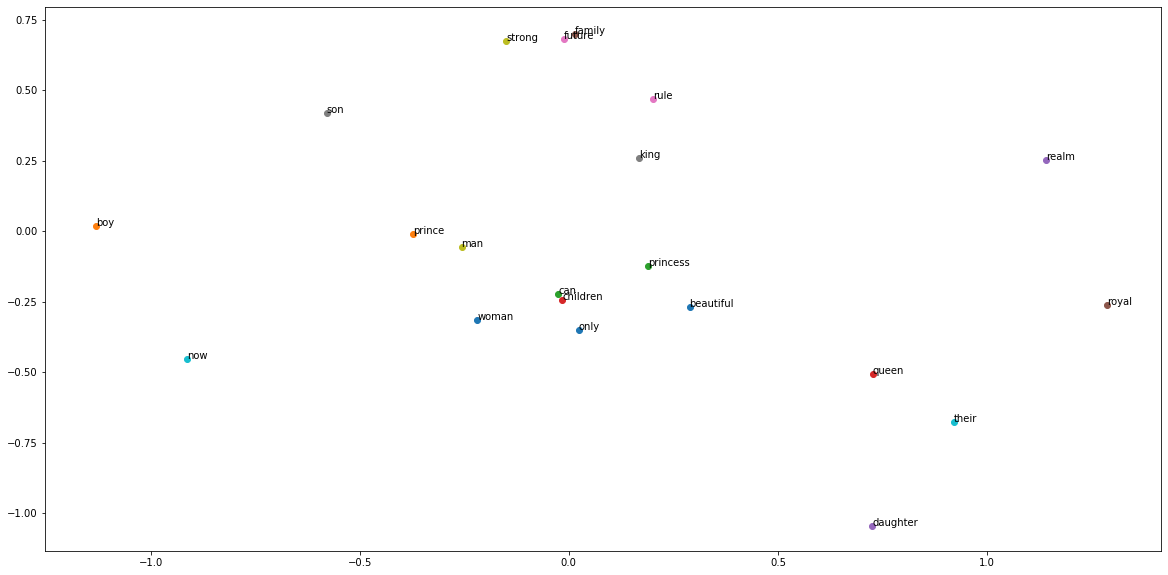

In [8]:
# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=7, activation='linear')(inp)

x = Dense(units=2, activation='linear')(x)

x = Dense(units=7, activation='linear')(x)
x = Dense(units=Y.shape[1], activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=1000
    )

# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]
print('weights  ',weights)
weights1 = model.get_weights()[1]
print('\n\n weights1  ',weights1)
# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

# Ploting the embeddings
plt.figure(figsize=(20, 10))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))   
print("\n\n")


        
               

# Saving the embedding vector to a txt file
try:
    os.mkdir(f'{os.getcwd()}\\output2')        
except Exception as e:
    print(f'Cannot create output folder: {e}')

with open(f'{os.getcwd()}\\output\\embedding.txt', 'w') as f:
    for key, value in embedding_dict.items():
        try:
            f.write(f'{key}: {value}\n')   
        except Exception as e:
            print(f'Cannot write word {key} to dict: {e}')             

In [9]:
weights = model.get_weights()[2]
print('weights  ',weights)

weights   [[ 0.90063244 -1.1290888 ]
 [-1.4149156  -0.5616876 ]
 [ 1.0951062   0.97565657]
 [-0.9066377   1.5240902 ]
 [-0.05326964  1.332713  ]
 [ 1.3210307   0.601781  ]
 [ 0.9512693   1.0473262 ]]


In [10]:
weights = model.get_weights()[3]
print('weights  ',weights)

weights   [ 0.01520086 -0.16306382]


In [11]:
weights = model.get_weights()[4]
print('weights  ',weights)

weights   [[-1.3640443   0.9300293  -0.6796091  -0.6141003  -0.8935815   0.96888477
  -1.0019956 ]
 [-0.52866244 -0.9427551   1.0531026   1.0083154  -1.308883    0.6202096
   0.10470199]]


In [12]:
weights = model.get_weights()[5]
print('weights  ',weights)

weights   [ 0.37996408 -0.7765097   0.80589795 -0.30113786  0.4586638   0.6247002
 -0.58361375]


In [13]:
weights = model.get_weights()[6]
print('weights  ',weights)

weights   [[-0.9819019   0.08320802 -0.01877871 -0.07840233 -0.3350612   0.06046667
   0.5980538   0.2960893   0.11410572  0.19538255  0.6629493   0.86665785
  -0.71907234  0.4154405   0.34303603  0.07314453  0.25898436  0.00471027
   0.43967456  0.1249477   0.01064386]
 [ 0.13289556 -0.5153795  -0.05272995  1.0548736   0.22799507  0.4656445
  -0.11643185  0.34300247 -0.81780136 -0.31046373 -0.62172765 -0.27779183
   0.95334387  0.22759405  0.6737681   0.82291365  0.82094395 -0.5358356
  -0.25802702  0.64354485 -0.09829753]
 [ 0.13754427  0.6852525  -0.02435447 -0.3947863  -0.5919344  -0.763466
   0.17460793 -0.428682    0.73775053  0.91191155  0.77506876  0.35795566
  -0.35024378  0.1800036  -0.84259003 -0.2320075  -0.99400425  0.7541563
   0.7549054  -0.17078269 -0.36634165]
 [ 0.5525231   1.1455612  -0.5945536  -0.55743384  0.8427811  -0.7586523
   0.27620634 -0.2473429   0.24303652  0.86222345  1.1144965   0.69994
   0.15644194 -0.79626733  0.10381126  0.17281547 -0.1927567   0.277

In [14]:
weights = model.get_weights()[7]
print('weights  ',weights)

weights   [-0.16240326  0.36868858  0.5046229  -0.4855494  -0.25973782 -0.30867815
 -0.18235001  0.2683022   0.02185197 -0.18911141  0.32789904  0.08730916
 -0.48430297  0.26752454 -0.3735709  -0.3131835  -0.29951236 -0.2590154
  0.02561585 -0.2185476   0.4564194 ]


In [15]:
weights.shape

(21,)